# Forest Fire Analysis

### play around with data 

In [1]:
# dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
from pprint import pprint
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests

In [2]:
# Import data from csv

fire_df = pd.read_csv("Resources/forestfires.csv")

fire_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# column descriptions

For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

   3. month - month of the year: 'jan' to 'dec' 

   4. day - day of the week: 'mon' to 'sun'

   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20

   6. DMC - DMC index from the FWI system: 1.1 to 291.3 

   7. DC - DC index from the FWI system: 7.9 to 860.6 

   8. ISI - ISI index from the FWI system: 0.0 to 56.10

   9. temp - temperature in Celsius degrees: 2.2 to 33.30

   10. RH - relative humidity in %: 15.0 to 100

   11. wind - wind speed in km/h: 0.40 to 9.40 

   12. rain - outside rain in mm/m2 : 0.0 to 6.4 

   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

   (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).

In [3]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
fire_df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [5]:
# drop NA
fire_df = fire_df.dropna(how='any')
fire_df.count()

X        517
Y        517
month    517
day      517
FFMC     517
DMC      517
DC       517
ISI      517
temp     517
RH       517
wind     517
rain     517
area     517
dtype: int64

In [6]:
spacial_group = fire_df.groupby(["X", "Y"])
spacial_group.count()

month  day  FFMC  DMC  DC  ISI  temp  RH  wind  rain  area
X Y                                                            
1 2     19   19    19   19  19   19    19  19    19    19    19
  3     10   10    10   10  10   10    10  10    10    10    10
  4     15   15    15   15  15   15    15  15    15    15    15
  5      4    4     4    4   4    4     4   4     4     4     4
2 2     25   25    25   25  25   25    25  25    25    25    25
  3      1    1     1    1   1    1     1   1     1     1     1
  4     27   27    27   27  27   27    27  27    27    27    27
  5     20   20    20   20  20   20    20  20    20    20    20
3 3      1    1     1    1   1    1     1   1     1     1     1
  4     43   43    43   43  43   43    43  43    43    43    43
  5      7    7     7    7   7    7     7   7     7     7     7
  6      4    4     4    4   4    4     4   4     4     4     4
4 3     22   22    22   22  22   22    22  22    22    22    22
  4     36   36    36   36  36   36    36  36    36    36    36
  5     25   25    25   25  25   25    25  25    25    25    25
  6      8    8     8    8   8    8     8   8     8     8     8
5 4     23   23    23   23  23   23    23  23    23    23    23
  5      3    3     3    3   3    3     3   3     3     3     3
  6      4    4     4    4   4    4     4   4     4     4     4
6 3     25   25    25   25  25   25    25  25    25    25    25
  4      9    9     9    9   9    9     9   9     9     9     9
  5     49   49    49   49  49   49    49  49    49    49    49
  6      3    3     3    3   3    3     3   3     3     3     3
7 3      2    2     2    2   2    2     2   2     2     2     2
  4     45   45    45   45  45   45    45  45    45    45    45
  5     11   11    11   11  11   11    11  11    11    11    11
  6      2    2     2    2   2    2     2   2     2     2     2
8 3      3    3     3    3   3    3     3   3     3     3     3
  4      1    1     1    1   1    1     1   1     1     1     1
  5      4    4     4    4   4    4     4   4     4     4     4
  6     52   52    52   52  52   52    52  52    52    52    52
  8      1    1     1    1   1    1     1   1     1     1     1
9 4      4    4     4    4   4    4     4   4     4     4     4
  5      2    2     2    2   2    2     2   2     2     2     2
  6      1    1     1    1   1    1     1   1     1     1     1
  9      6    6     6    6   6    6     6   6     6     6     6

In [7]:
spacial_group["area"].sum()

X  Y
1  2     219.94
   3     157.14
   4     150.28
   5     115.47
2  2     462.65
   3       0.00
   4     143.37
   5      92.63
3  3       6.58
   4     126.35
   5       2.18
   6       0.00
4  3     172.88
   4     397.43
   5     287.01
   6      87.73
5  4      73.75
   5       0.00
   6      17.62
6  3     192.78
   4     144.47
   5    1384.05
   6       8.59
7  3      27.35
   4     474.37
   5      77.39
   6      86.45
8  3      26.31
   4      12.18
   5       2.93
   6    1265.30
   8     185.76
9  4     185.61
   5       8.16
   6      42.87
   9       4.47
Name: area, dtype: float64

In [8]:
# spacial summary stats

spacial_means = round(spacial_group[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']].mean(), 2)
spacial_medians = spacial_group[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']].median()
spacial_means

FFMC     DMC      DC    ISI   temp     RH  wind  rain    area
X Y                                                                
1 2  91.97  129.21  629.97   9.65  20.75  42.42  3.84  0.00   11.58
  3  92.06  144.64  637.31   8.94  21.73  44.40  4.28  0.00   15.71
  4  91.51  143.00  699.68   8.91  19.61  46.47  3.68  0.00   10.02
  5  92.20  137.68  707.28   7.55  25.00  32.25  2.55  0.00   28.87
2 2  91.13  113.94  525.83   9.91  18.53  41.20  3.94  0.00   18.51
  3  91.60  108.40  764.00   6.20  18.00  51.00  5.40  0.00    0.00
  4  89.19  126.56  623.66   9.51  21.83  44.22  3.85  0.00    5.31
  5  92.24  136.72  616.64   9.52  21.54  43.10  3.71  0.00    4.63
3 3  92.20  102.30  751.50   8.40  24.20  27.00  3.10  0.00    6.58
  4  90.61  100.33  505.52   8.88  17.71  43.14  4.38  0.00    2.94
  5  90.41   81.01  436.91   7.57  14.71  42.00  3.77  0.00    0.31
  6  91.38  109.70  457.85   7.42  17.80  50.00  3.35  0.00    0.00
4 3  91.45  105.79  600.85   8.85  21.05  42.32  3.56  0.00    7.86
  4  90.87   92.93  530.78   8.71  17.91  40.69  4.35  0.01   11.04
  5  88.33  111.05  531.33   8.62  17.86  41.64  3.63  0.00   11.48
  6  85.70   50.90  340.75   6.68  12.25  46.25  4.40  0.00   10.97
5 4  91.85  116.75  559.57  10.40  18.62  44.74  4.50  0.06    3.21
  5  92.20   34.20   70.70   8.83  14.67  51.67  5.10  0.00    0.00
  6  91.85  110.75  523.05   9.57  20.00  47.75  3.80  0.00    4.40
6 3  90.44   88.48  576.37   7.50  18.54  40.40  4.02  0.00    7.71
  4  89.31   89.87  359.44   7.11  15.39  44.67  3.23  0.00   16.05
  5  89.01   91.10  461.00   7.85  16.48  45.73  4.30  0.00   28.25
  6  95.47  133.93  582.57  13.93  25.90  36.00  3.40  0.00    2.86
7 3  89.10   47.95  395.35   5.85  14.40  36.50  4.90  0.00   13.68
  4  90.89  116.82  590.34  10.31  17.88  50.91  4.21  0.02   10.54
  5  91.60  111.83  553.58  10.14  19.62  49.55  4.05  0.65    7.04
  6  92.15  181.75  434.25  11.75  19.75  59.00  6.50  0.10   43.22
8 3  88.77   83.50  528.70   8.60  20.57  44.33  4.17  0.00    8.77
  4  91.60  273.80  819.10   7.70  21.30  44.00  4.50  0.00   12.18
  5  90.20  109.35  675.50   8.70  21.32  43.75  3.32  0.00    0.73
  6  91.45  133.92  584.88   9.55  19.82  46.50  3.89  0.02   24.33
  8  91.70  191.40  635.90   7.80  26.20  36.00  4.50  0.00  185.76
9 4  89.70   82.70  460.38   7.85  24.22  38.00  2.90  0.00   46.40
  5  93.30   49.50  297.70  14.00  28.00  34.00  4.50  0.00    4.08
  6  91.60  248.40  753.80   6.30  20.50  58.00  2.70  0.00   42.87
  9  89.12   79.72  334.15   7.60  20.07  42.33  3.27  0.00    0.74

In [9]:
fire_df["month"].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

# Per Month Counts

In [10]:
# rename months and days
months_ordered = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

months_rename = fire_df.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], months_ordered)
rename_df = months_rename.replace(["mon", "tue", "wed", "thu", "fri", "sat", "sun"], days_ordered)

rename_df['month'] = pd.Categorical(rename_df['month'], categories=months_ordered, ordered=True)

sort_by_months = rename_df.sort_values(by="month")
sort_by_months

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
104,2,4,January,Saturday,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
379,4,5,January,Sunday,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
96,3,4,February,Saturday,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
59,2,2,February,Friday,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
202,7,4,February,Sunday,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,December,Wednesday,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19
281,6,5,December,Tuesday,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77
273,4,6,December,Sunday,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
279,4,4,December,Monday,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77


In [22]:
# group by months
month_group = rename_df.groupby("month", observed=False)

# count fires per month
fires_per_month = month_group["month"].count()
fires_per_month

month
January        2
February      20
March         54
April          9
May            2
June          17
July          32
August       184
September    172
October       15
November       1
December       9
Name: month, dtype: int64

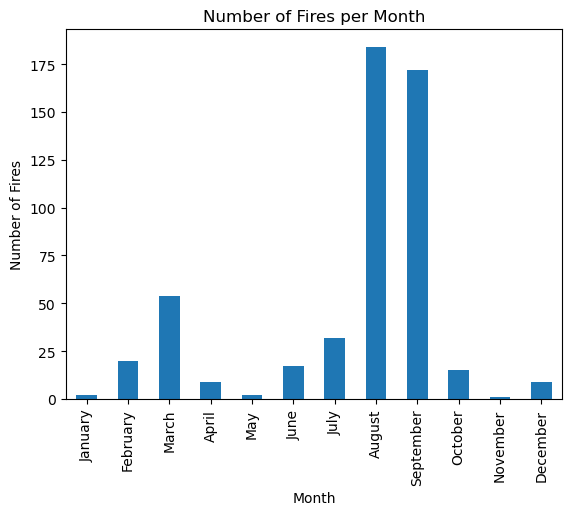

In [12]:
# graph fires per month
fires_per_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.title("Number of Fires per Month")

plt.show()

In [13]:
# total area affected per month
area_per_month = month_group["area"].sum()
area_per_month

month
January         0.00
February      125.50
March         235.26
April          80.02
May            38.48
June           99.30
July          459.83
August       2297.99
September    3086.13
October        99.57
November        0.00
December      119.97
Name: area, dtype: float64

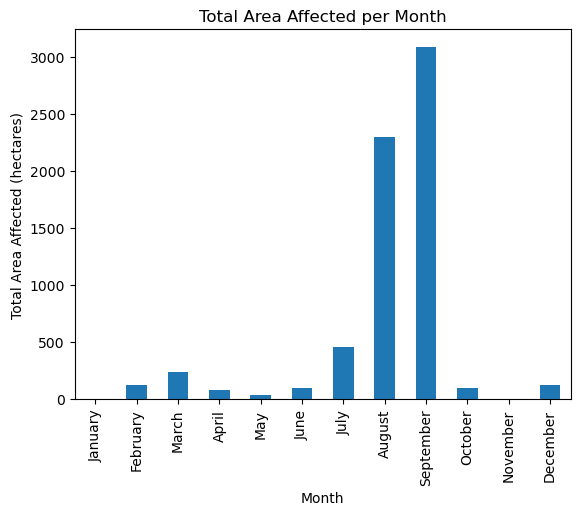

In [14]:
# graph area affected per month

area_per_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Total Area Affected (hectares)")
plt.title("Total Area Affected per Month")

plt.show()

In [15]:
ffmc = month_group["FFMC"]
ffmc.mean()

month
January      50.400000
February     82.905000
March        89.444444
April        85.788889
May          87.350000
June         89.429412
July         91.328125
August       92.336957
September    91.243023
October      90.453333
November     79.500000
December     84.966667
Name: FFMC, dtype: float64

# Day of the Week Counts

In [16]:
rename_df['day'] = pd.Categorical(rename_df['day'], categories=days_ordered, ordered=True)
sort_by_day = rename_df.sort_values(by="day")

# group by day
day_group = rename_df.groupby("day", observed=False)

# count fires per month
fires_per_day = day_group["day"].count()
fires_per_day

day
Monday       74
Tuesday      64
Wednesday    54
Thursday     61
Friday       85
Saturday     84
Sunday       95
Name: day, dtype: int64

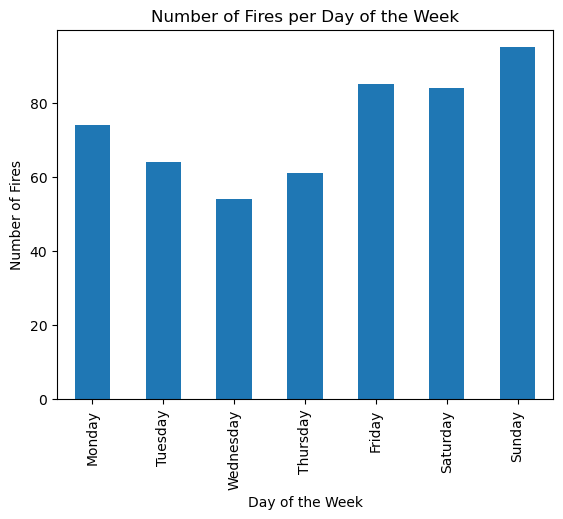

In [17]:
# graph fires per month
fires_per_day.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Fires")
plt.title("Number of Fires per Day of the Week")

plt.show()

In [18]:
# total area affected per day
area_per_day = day_group["area"].sum()
area_per_day

day
Monday        706.53
Tuesday       807.79
Wednesday     578.60
Thursday      997.10
Friday        447.24
Saturday     2144.86
Sunday        959.93
Name: area, dtype: float64

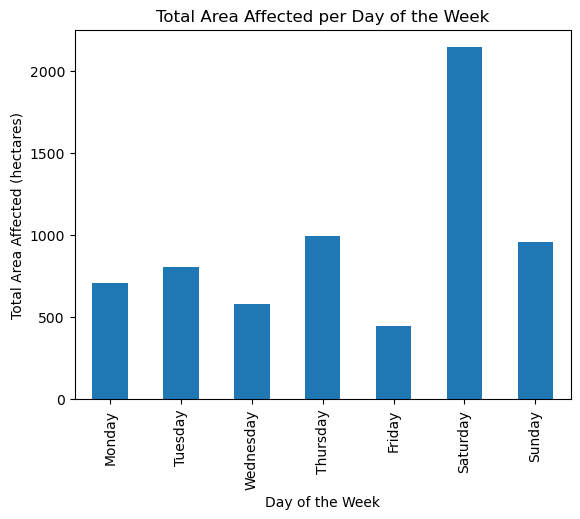

In [19]:
# graph area affected per day

area_per_day.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Total Area Affected (hectares)")
plt.title("Total Area Affected per Day of the Week")

plt.show()

# Outliers

In [20]:
dfq = fire_df[["FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "area"]]
col = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']
bp_data = []

for category in dfq.columns:
    quartiles = dfq[category].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(category)
    
    # data for boxplots
    
    bp_data.append(dfq[category])
    
    # Determine outliers using upper and lower bounds
    
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
    print(lowerb)
    print(upperb)
    outlier = dfq[category].loc[(dfq[category] < lowerb) | (dfq[category] > upperb)]

    print(f"{category}'s potential outliers: {outlier}")

FFMC
86.15
96.95000000000002
FFMC's potential outliers: 12     63.5
17     84.9
40     79.5
58     84.0
75     84.2
96     83.9
97     69.0
104    82.1
105    85.9
110    85.9
123    84.4
130    68.2
138    85.8
147    84.4
165    84.9
171    85.6
176    81.5
181    84.9
196    81.5
199    63.5
202    83.9
233    84.4
239    81.9
241    83.0
273    84.4
274    84.0
275    84.6
276    85.4
277    85.4
278    85.4
279    85.4
280    84.7
281    85.4
282    84.9
284    85.2
299    53.4
304    85.1
312    50.4
379    18.7
390    84.7
394    84.1
395    85.0
407    84.7
410    84.1
411    84.6
463    75.1
464    75.1
465    79.5
511    81.6
512    81.6
513    81.6
514    81.6
516    79.5
Name: FFMC, dtype: float64
DMC
-42.10000000000002
253.10000000000002
DMC's potential outliers: 369    276.3
370    276.3
374    290.0
384    273.8
392    276.3
406    291.3
408    290.0
422    263.1
430    287.2
434    269.8
437    253.6
440    290.0
444    290.0
448    284.9
453    266.2
459    273.8
462  

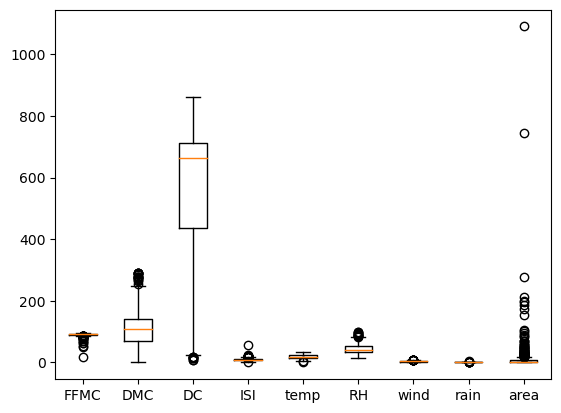

In [21]:
# outliers = dict(markerfacecolor='red',markersize=12)

plt.boxplot(bp_data, labels= col)
plt.show()

# Try dropping 0 area and see what happens

In [26]:
non0_df= rename_df[rename_df["area"] != 0]

In [27]:
non0_df.describe

<bound method NDFrame.describe of      X  Y      month        day  FFMC    DMC     DC   ISI  temp  RH  wind  \
138  9  9       July    Tuesday  85.8   48.3  313.4   3.9  18.0  42   2.7   
139  1  4  September    Tuesday  91.0  129.5  692.6   7.0  21.7  38   2.2   
140  2  5  September     Monday  90.9  126.5  686.5   7.0  21.9  39   1.8   
141  1  2     August  Wednesday  95.5   99.9  513.3  13.2  23.3  31   4.5   
142  8  6     August     Friday  90.1  108.0  529.8  12.5  21.2  51   8.9   
..  .. ..        ...        ...   ...    ...    ...   ...   ...  ..   ...   
509  5  4     August     Friday  91.0  166.9  752.6   7.1  21.1  71   7.6   
510  6  5     August     Friday  91.0  166.9  752.6   7.1  18.2  62   5.4   
512  4  3     August     Sunday  81.6   56.7  665.6   1.9  27.8  32   2.7   
513  2  4     August     Sunday  81.6   56.7  665.6   1.9  21.9  71   5.8   
514  7  4     August     Sunday  81.6   56.7  665.6   1.9  21.2  70   6.7   

     rain   area  
138   0.0   0.36  
139

In [28]:
# rename months and days

non0_months_rename = non0_df.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"], months_ordered)
non0_rename_df = non0_months_rename.replace(["mon", "tue", "wed", "thu", "fri", "sat", "sun"], days_ordered)

non0_rename_df['month'] = pd.Categorical(non0_rename_df['month'], categories=months_ordered, ordered=True)

non0_sort_by_months = non0_rename_df.sort_values(by="month")

# group by months
non0_month_group = non0_rename_df.groupby("month", observed=False)

# count fires per month
non0_fires_per_month = non0_month_group["month"].count()
non0_fires_per_month

month
January       0
February     10
March        19
April         4
May           1
June          8
July         18
August       99
September    97
October       5
November      0
December      9
Name: month, dtype: int64

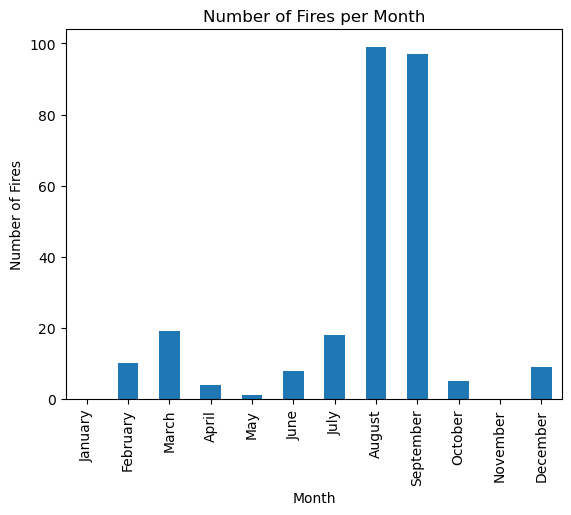

In [29]:
# graph fires per month
non0_fires_per_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Days With Active Fire")
plt.title("Days per Month With Active Fire")

plt.show()

In [30]:
non0_rename_df['day'] = pd.Categorical(non0_rename_df['day'], categories=days_ordered, ordered=True)
non0_sort_by_day = non0_rename_df.sort_values(by="day")

# group by day
non0_day_group = non0_rename_df.groupby("day", observed=False)

# count fires per month
non0_fires_per_day = non0_day_group["day"].count()
non0_fires_per_day

day
Monday       39
Tuesday      36
Wednesday    32
Thursday     31
Friday       43
Saturday     42
Sunday       47
Name: day, dtype: int64

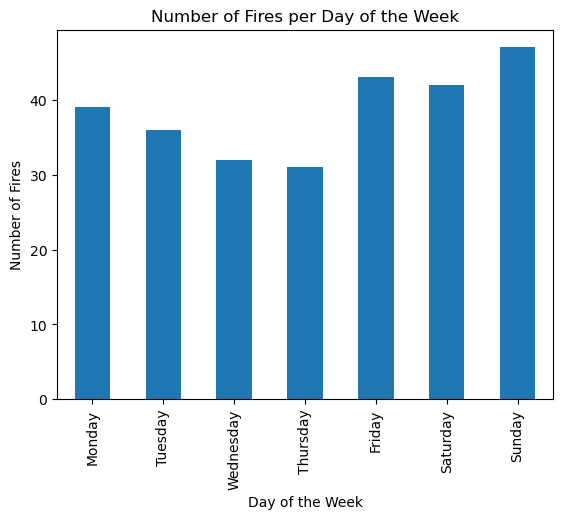

In [31]:
# graph fires per day of the week
non0_fires_per_day.plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Fires")
plt.title("Number of Fires per Day of the Week")

plt.show()